### Replicating the plots in the documentation in https://github.com/sisl/PGFPlots.jl

In [1]:
import PGFPlotsX: Axis, Plot, Plot3, @pgf, PolarAxis, TikzDocument, GroupPlot, TikzPicture,
                  Table, Expression, Coordinates, Graphics
using LaTeXStrings
using Colors
using StatsBase

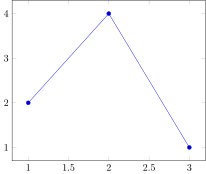

In [2]:
x = [1, 2, 3]
y = [2, 4, 1]  
Plot(Coordinates(x, y))

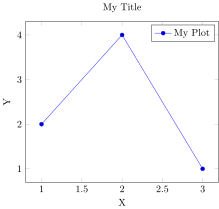

In [3]:
@pgf axis = Axis(Plot(Coordinates(x, y); label = "My Plot"),
    {
        xlabel = "X",
        ylabel = "Y",
        title = "My Title",
    })

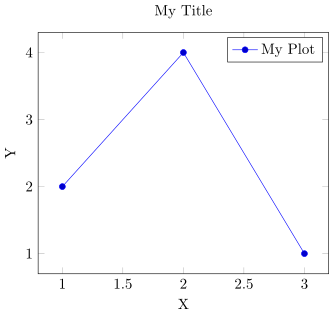

In [4]:
TikzPicture(axis, "scale" => 1.5)

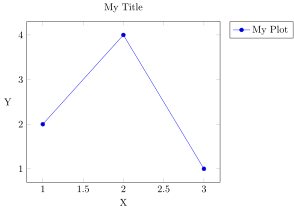

In [5]:
# A "pgf object" can be copied and new options can be merged into an existing pgf object
axis_new = copy(axis)
new_options = @pgf {
    ylabel_style = { rotate = -90, }
    legend_style = { at = { "(1.05, 1.0)" } 
                     anchor = "north west" }
    }

merge!(axis_new, new_options)
axis_new

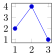

In [6]:
# Can set options using `Pair`s or key => value, but usually more convenient with @pgf macro
Axis(Plot(Coordinates(x, y)), "width" => "3 cm", "height" => " 3 cm")

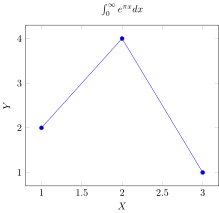

In [7]:
@pgf Axis(Plot(Coordinates(x, y)),
    {
        xlabel = L"X",
        ylabel = L"Y",
        title = L"\int_0^\infty e^{\pi x}dx",
    })

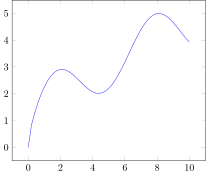

In [8]:
Plot(Coordinates(linspace(0, 10, 51), 
                 x -> sqrt(2* x) + sin(x)), 
    "mark" => "none")

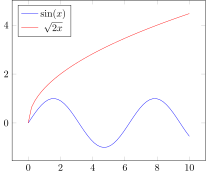

In [9]:
x = linspace(0, 10)
@pgf Axis([
     Plot(Coordinates(x, sin), { mark = "none" }; label = L"\sin(x)"),
     Plot(Coordinates(x, x -> sqrt(2*x)), { mark = "none" }; label = L"\sqrt{2x}")
    ], {
        legend_pos = "north west"
    })


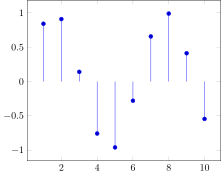

In [10]:
Plot(Coordinates(1:10, sin), "ycomb")

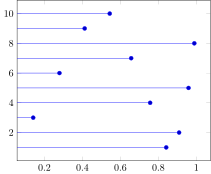

In [11]:
Plot(Coordinates(abs.(sin.(1:10)), 1:10), "xcomb")

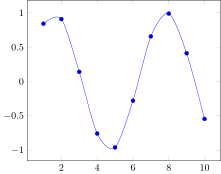

In [12]:
Plot(Coordinates(1:10, sin), "smooth")

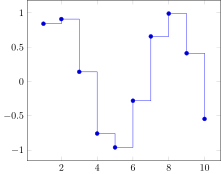

In [13]:
Plot(Coordinates(1:10, sin), "const plot")

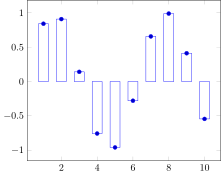

In [14]:
Plot(Coordinates(1:10, sin), "ybar")

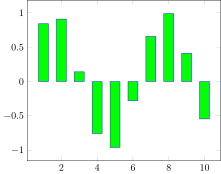

In [15]:
@pgf Plot(Coordinates(1:10, sin), {ybar, fill = "green", mark = "none"})

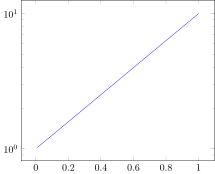

In [16]:
x = 0.01:0.01:1
Axis(Plot(Coordinates(x, 10.^x), "mark" => "none"), "ymode" => "log")

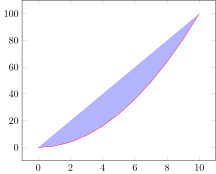

In [17]:
x = 0:10
@pgf Plot(Coordinates(x, x.^2), {red, fill = "blue", fill_opacity = 0.3, mark = "none"})

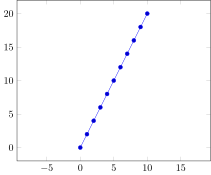

In [18]:
x = 0:10
@pgf Axis(Plot(Coordinates(x, 2.*x)), 
    { 
        xmin = 0,
        xmax = 10, 
        axis_equal,
    }
)

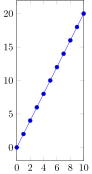

In [19]:
x = 0:10
@pgf Axis(Plot(Coordinates(x, 2.*x)), 
    { 
        xmin = 0,
        xmax = 10, 
        axis_equal_image,
    }
)

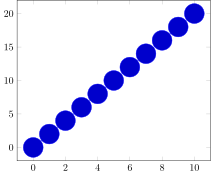

In [20]:
x = 0:10
@pgf Plot(Coordinates(x, 2.*x), { mark_size = 10 })

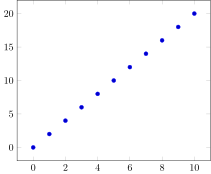

In [21]:
x = 0:10
@pgf Plot(Coordinates(x, 2.*x), { only_marks })

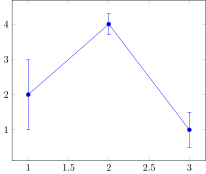

In [22]:
x = [1,2,3]
y = [2,4,1]

@pgf Plot(Coordinates(x, y, yerror = [1, 0.3, 0.5]), { "error bars/.cd", y_dir = "both", y_explicit } )

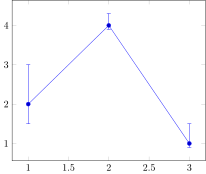

In [23]:
@pgf Plot(Coordinates(x, y, yerrorplus = [1, 0.3, 0.5], yerrorminus=[0.5, 0.1, 0.1]),
        { "error bars/.cd", y_dir = "both", y_explicit } )

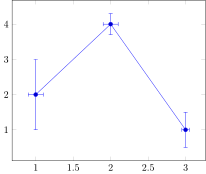

In [24]:
@pgf Plot(Coordinates(x, y, yerror = [1, 0.3, 0.5], xerror = [0.1, 0.1, 0.05]),
        { "error bars/.cd", y_dir = "both", x_dir = "both", y_explicit, x_explicit } )

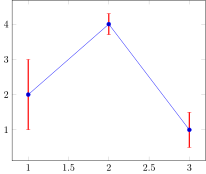

In [25]:
@pgf Plot(Coordinates(x, y, yerror = [1, 0.3, 0.5]), 
    { 
        "error bars/.cd",
        y_dir = "both",
        y_explicit ,
        error_bar_style = {
            red,
            very_thick,
        }
    }
)


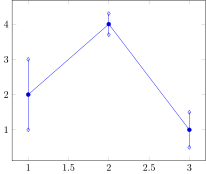

In [26]:
@pgf Plot(Coordinates(x, y, yerror = [1, 0.3, 0.5]), 
    { 
        "error bars/.cd",
        y_dir = "both",
        y_explicit ,
        error_mark = "diamond"
    }
)

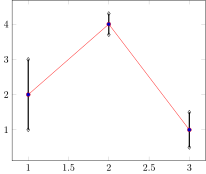

In [27]:
@pgf Plot(Coordinates(x, y, yerror = [1, 0.3, 0.5]), 
    { 
        red,
        "error bars/.cd",
        y_dir = "both",
        y_explicit ,
        error_mark = "diamond",
         error_bar_style = {
            black,
            very_thick,
        }
    }
)

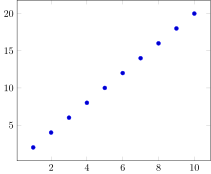

In [28]:
x = 1:10
y = 2x
Plot(Coordinates(x, 2.*x), "only marks")

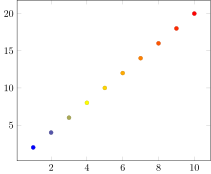

In [29]:
z = collect(3x)
@pgf Plot(Coordinates(x, 2.*x; metadata = z), { only_marks, scatter, scatter_src = "explicit" })

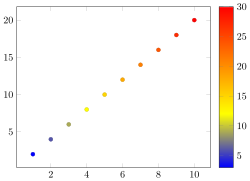

In [30]:
z = collect(3x)
@pgf Axis(Plot(Coordinates(x, 2.*x; metadata = z), 
        { only_marks, scatter, scatter_src = "explicit" }),
    { colorbar }
)

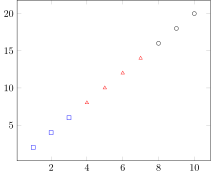

In [31]:
z = ["a", "a", "a", "b", "b", "b", "b", "c", "c", "c"]
@pgf a = Axis(Plot(Coordinates(x, 2.*x; metadata = z), 
        { 
          only_marks, 
          scatter,
          scatter_src = "explicit symbolic" 
        }; incremental = false),
    {
        "scatter/classes" = {
            a = { mark = "square", blue },
            b = { mark = "triangle", red },
            c = { mark = "o", draw = "black" },
        }
    }
)

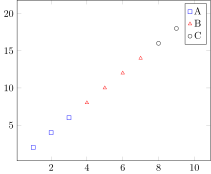

In [32]:
a2 = copy(a)
push!(a2, "\\legend{A, B, C}")

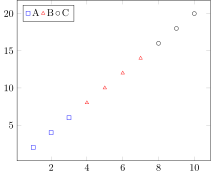

In [33]:
a3 = copy(a2)
a3["legend columns"] = -1
a3["legend pos"] = "north west"
a3

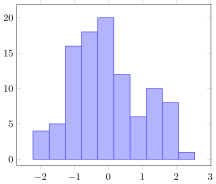

In [34]:
d = randn(100)
@pgf Axis(Plot(Table(d, { y_index = 0 }), { hist = { bins = 10, } }), { ybar })

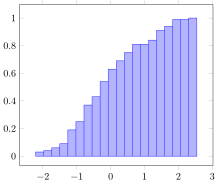

In [35]:
@pgf Axis(Plot(Table(d, { y_index = 0 }), { hist = { bins = 20, cumulative = true, density = true} }), { ybar })

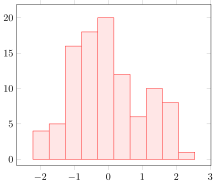

In [36]:
@pgf Axis(Plot(Table(d, { y_index = 0 }), { hist = { bins = 10 } }, { red, fill = "red!10" }), { ybar })

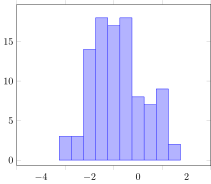

In [37]:
histogram  = fit(Histogram, d; closed = :left, nbins = 20)
@pgf a = Axis(Plot(Table(histogram)),
    {
        xmin = -4,
        xmax = 4,
        ybar_interval,
        xtick = [],
        xmajorgrids = false,
 })

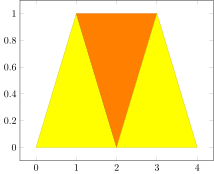

In [38]:
x = [0, 1, 2,   1, 2, 3,   2, 3, 4]
y = [0, 1, 0,   1, 0, 1,   0, 1 ,0]
Plot(Table(x = x, y = y), "patch"; incremental = false)

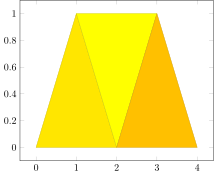

In [39]:
c = [0.2, 0, 1,   0, 1, 0,   1, 0, 0.5]
@pgf Plot(Table({point_meta = "\\thisrow{c}"},  x = x, y = y, c = c), { patch }; incremental = false)

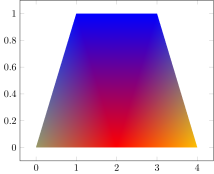

In [40]:
@pgf Plot(Table({point_meta = "\\thisrow{c}"},  x = x, y = y, c = c), 
    { patch, shader = "interp" }; incremental = false)

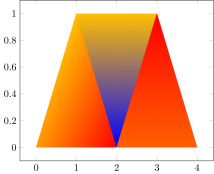

In [41]:
c = [0.2, 0, 1,   0, -1, 0,   0.5, 1, 0.5]
@pgf Plot(Table({point_meta = "\\thisrow{c}"},  x = x, y = y, c = c), 
    { patch, shader = "interp" }; incremental = false)

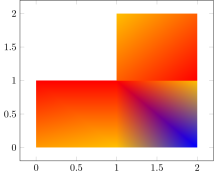

In [42]:
x = [0,   1, 1, 0,     1,  2, 2, 1,    1,   2, 2,   1]
y = [0,   0, 1, 1,     0,  0, 1, 1,    1,   1, 2,   2]
c = [0.2, 0, 1, 1,     0, -1, 0, 1,    0.5, 1, 0.5, 0]
@pgf Plot(Table({point_meta = "\\thisrow{c}"},  x = x, y = y, c = c), 
    { patch, shader = "interp", patch_type = "rectangle" }; incremental = false)

In [43]:
using Contour
x = -2:0.1:2
f = (x, y) -> x * exp(-x^2 - y^2)
z = f.(x, x');

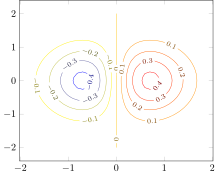

In [44]:
levels = -0.4:0.1:4
@pgf p = Plot(Table(contours(x, x, z, levels)), { contour_prepared }; incremental = false)

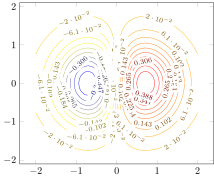

In [45]:
levels = 20
@pgf p = Plot(Table(contours(x, x, z, levels)), { contour_prepared }; incremental = false)

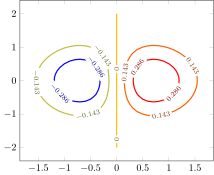

In [46]:
@pgf p = Plot(Table(contours(x, x, z, 5)), {contour_prepared, style => "very thick" }; incremental = false)

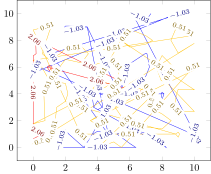

In [47]:
@pgf p = Plot(Table(contours(0:1.0:10, 0:1.0:10, randn(11,11), 3)), {contour_prepared }; incremental = false)

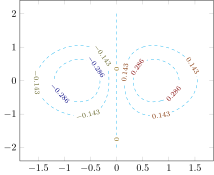

In [48]:
@pgf p = Plot(Table(contours(x, x, z, 5)), 
    {
        contour_prepared = {
            draw_color = "cyan"
        }, 
        dashed,
    }; incremental = false
)

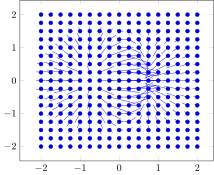

In [49]:
# This is a bit awkward
x = linspace(-2, 2, 17)
y = x
X = [X for X in x for y in y]
Y = [y for X in x for y in y]
ux = (x,y) -> exp(-x^2-y^2)*(1-2*x^2)
uy = (x,y) -> exp(-x^2-y^2)*(-2*x*y)
xgrid = 
t = Table(x = X, y = Y, u = ux.(X, Y), v = uy.(X, Y))
@pgf p = Plot(t, {quiver = {u = "\\thisrow{u}", v = "\\thisrow{v}" }})


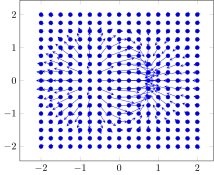

In [50]:
p["-stealth"] = nothing
p

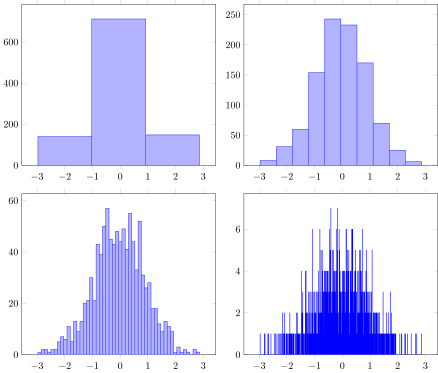

In [51]:
# generate 1000 samples
d = randn(1000)
plots = []
@pgf for bins in [3, 10, 50, 1000] # This will write the data inline multiple times
    push!(plots, Plot(Table(d, { y_index = 0 }), 
        {  hist = { bins = bins, } }))
end
@pgf GroupPlot(plots, {ybar, ymin = 0, group_style = {group_size = "2 by 2"} })

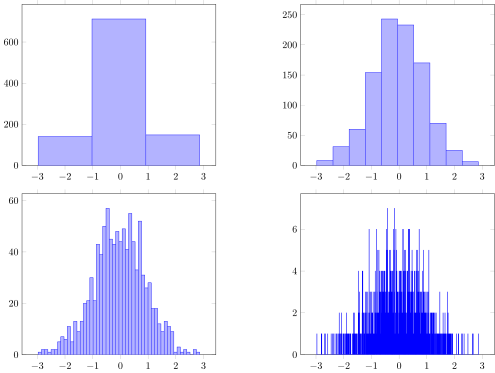

In [52]:
@pgf GroupPlot(plots, {ybar, ymin = 0, group_style = {group_size = "2 by 2", horizontal_sep = "3cm"} })

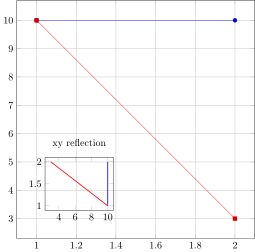

In [53]:
@pgf begin
a1 = Axis([Plot(Coordinates([1, 2], [10, 10]), { blue }),
           Plot(Coordinates([1, 2], [10, 3]),  { red })],
    {
        width = "10cm",
        height = "10cm",
        grid = "both"
    }
)
    
a2 = Axis([Plot(Coordinates([10,10], [1, 2]), { blue, no_marks, thick }),
           Plot(Coordinates([10,3],  [1, 2]), { red , no_marks, thick})],
    {
        width = "4cm",
        xshift = "1cm",
        yshift = "1cm",
        title = "xy reflection"    
    }
)     
end

[a1, a2]

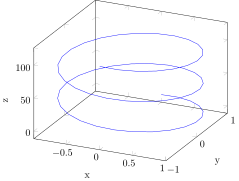

In [54]:
t = rad2deg.(linspace(0,5pi,60))
x = sind.(t)
y = cosd.(t)
z = 2t/(5pi)
@pgf begin
p = Plot3(Coordinates(x, y, z), { mark = "none" })
Axis(p,
    {
        xlabel = "x"
        ylabel = "y"
        zlabel = "z"
    })
end

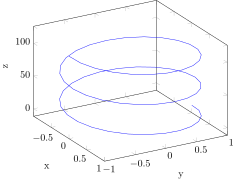

In [55]:
@pgf Axis(p,
    {
        view = (60, 30)
        xlabel = "x"
        ylabel = "y"
        zlabel = "z"
    })

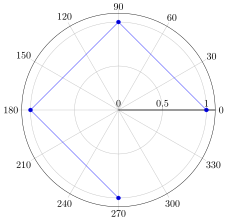

In [56]:
PolarAxis(Plot(Coordinates([0, 90, 180, 270], [1, 1, 1, 1])))

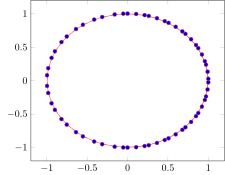

In [57]:
@pgf td = TikzDocument(
    [("myrgbcolor1", RGB(1.0, 0.2, 0.3)),
     TikzPicture(Axis(Plot(Coordinates(x, y), { myrgbcolor1 })))
    ]
)

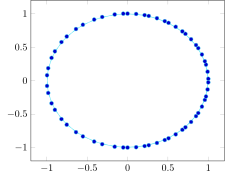

In [58]:
@pgf td = TikzDocument(
    [("myRGBcolor1", RGB(82/255, 227/255, 246/255)),
     TikzPicture(Axis(Plot(Coordinates(x, y), { myRGBcolor1 })))
    ]
)

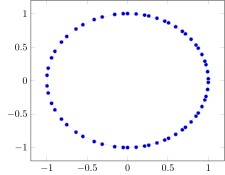

In [59]:
@pgf td = TikzDocument(
    [("mylightgray", Gray(0.9)),
     TikzPicture(Axis(Plot(Coordinates(x, y), { mylightgray }))) 
     ]
)

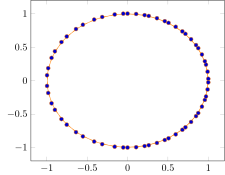

In [60]:
@pgf td = TikzDocument(
    [("myhtmlcolor", colorant"0xff7f00"),
     TikzPicture(Axis(Plot(Coordinates(x, y), { myhtmlcolor }))) 
     ]
)

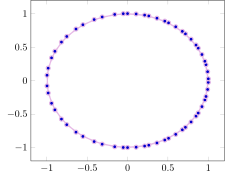

In [61]:
@pgf td = TikzDocument(
    [("mycolor", HSV(300, 0.2, 0.9)),
     TikzPicture(Axis(Plot(Coordinates(x, y), { mycolor, very_thick }))) 
     ]
)

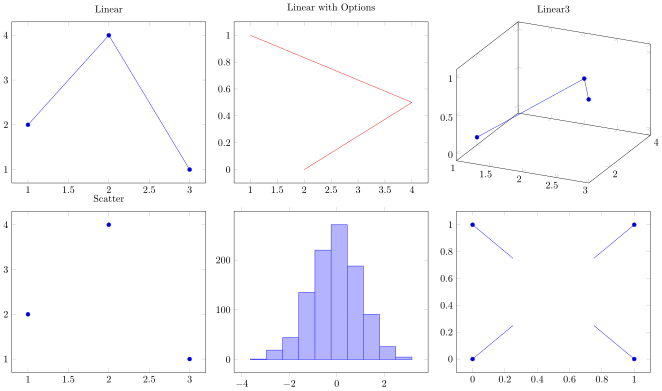

In [62]:
using DataFrames
df = DataFrame(x=[1,2,3], y=[2,4,1], z=[0.0,0.5,1.0])
df_quiver = DataFrame(x=[0,0,1,1], y=[0,1,0,1], u=[0.25,0.25,-0.25,-0.25], v=[0.25,-0.25,0.25,-0.25])
df_big = DataFrame(x=randn(1000), y=randn(1000))

@pgf begin
g = GroupPlot({ group_style = {group_size = "3 by 2"}, })
push!(g, Plot(Table(df)), {title = "Linear"})
push!(g, Plot(Table(df, { x = "y", y = "z", }), { red, mark = "none" }), { title = "Linear with Options" })
push!(g, Plot3(Table(df)), {title = "Linear3"} )
push!(g, Plot(Table(df), { only_marks }), {title = "Scatter" } )
push!(g, Plot(Table(df_big), { hist = { bins = 10, } }), { ybar })
push!(g, Plot(Table(df_quiver), {quiver = {u = "\\thisrow{u}", v = "\\thisrow{v}" }}))
end
g

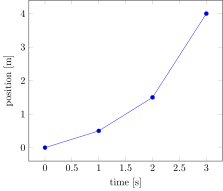

In [63]:
df = DataFrame(position=[0.0,0.5,1.5,4.0], time=[0.0,1.0,2.0,3.0])
@pgf Axis(Plot(Table(df, { x = "time", y = "position"})), { xlabel="time [s]", ylabel="position [m]" })

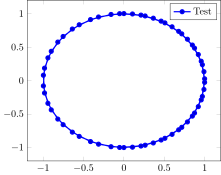

In [64]:
@pgf Axis([
    Plot(Coordinates(x, y), { very_thick }),
    "\\legend{Test}"
    ])

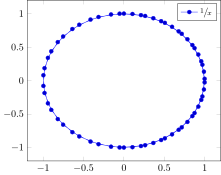

In [65]:
push!(PGFPlotsX.CUSTOM_PREAMBLE, "\\usepackage{xfrac}")
Axis(Plot(Coordinates(x, y); label = L"\sfrac{1}{x}"))

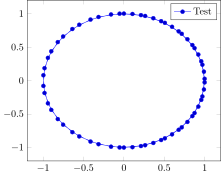

In [66]:
empty!(PGFPlotsX.CUSTOM_PREAMBLE)
Axis(Plot(Coordinates(x, y); label = "Test"))

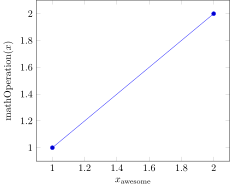

In [67]:
empty!(PGFPlotsX.CUSTOM_PREAMBLE)

push!(PGFPlotsX.CUSTOM_PREAMBLE, "\\usepackage{amsmath}")
@pgf a = Axis(Plot(Coordinates([1, 2], [1,2])), 
    {
        xlabel = L"x_\text{awesome}",
        ylabel = L"\text{mathOperation}(x)"
    }
)